In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
file_path = "/content/drive/MyDrive/nn.csv"
data = pd.read_csv(file_path)

In [23]:
print(data.head())

   x  y  z  class
0  0  ^  *      0
1  0  ^  *      0
2  0  ^  *      2
3  0  ^  *      1
4  0  ^  *      0


In [25]:
X = data[['x', 'y', 'z']].values  # Adjust based on column names in the dataset
y = data['class'].values  # Adjust based on the column name for the target variable

In [24]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [30]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(8, activation='relu'),  # Second hidden layer
    Dense(num_classes, activation='softmax')  # Output layer for classification
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=50, batch_size=8, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.0164 - val_accuracy: 1.0000 - val_loss: 1.0588
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 1.0106 - val_accuracy: 1.0000 - val_loss: 1.0628
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 1.0049 - val_accuracy: 1.0000 - val_loss: 1.0667
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.9992 - val_accuracy: 1.0000 - val_loss: 1.0705
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.9934 - val_accuracy: 1.0000 - val_loss: 1.0742
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5000 - loss: 0.9877 - val_accuracy: 1.0000 - val_loss: 1.0778
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5000 - loss: 0.9822 - val_accuracy: 1.0000 - val_loss: 1.0813
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7500 - loss: 0.9767 - val_accuracy: 1.0000 - val_loss: 1.0848

Test Loss: 0.7830, Test Accuracy: 1.0000


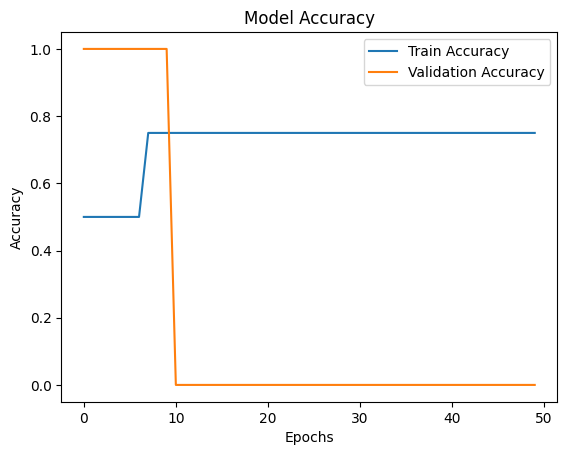

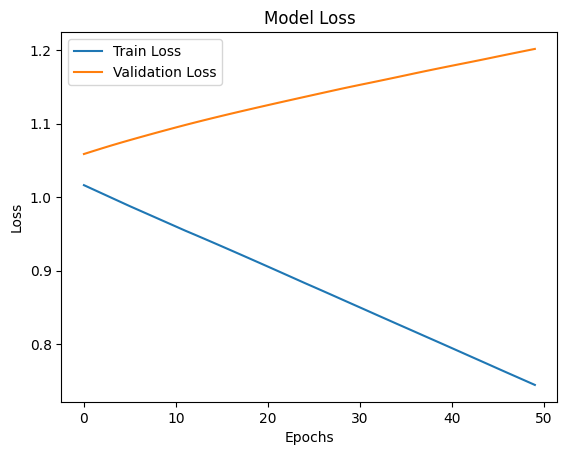

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

# Print evaluation results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()